<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_3/Aula_1_Entendendo_a_serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sessão 1 - Coleta de dados e primeiras análises

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/dados_covid_sp.zip?raw=true", compression = "zip", sep = ";")

In [3]:
df.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [4]:
df.loc[:,"datahora"] = pd.to_datetime(df.loc[:,"datahora"], format = "%Y-%m-%d")

In [5]:
mpl.rcParams["font.size"] = 15
mpl.rcParams["figure.figsize"] = (16,8)

## Desafio "geral"  - fazer melhorias nos gráficos:

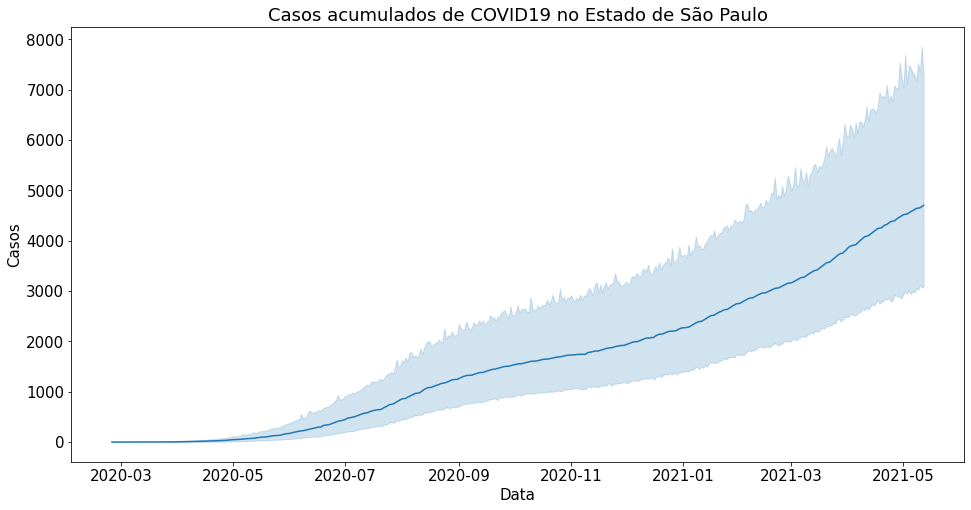

In [6]:
plt.title("Casos acumulados de COVID19 no Estado de São Paulo")
sns.lineplot(data = df, x = "datahora", y = "casos")
plt.ylabel("Casos")
plt.xlabel("Data")
plt.show()

$$ e^x $$

In [7]:
x = np.linspace(-2,2,100)

In [8]:
y_exp = np.exp(x)

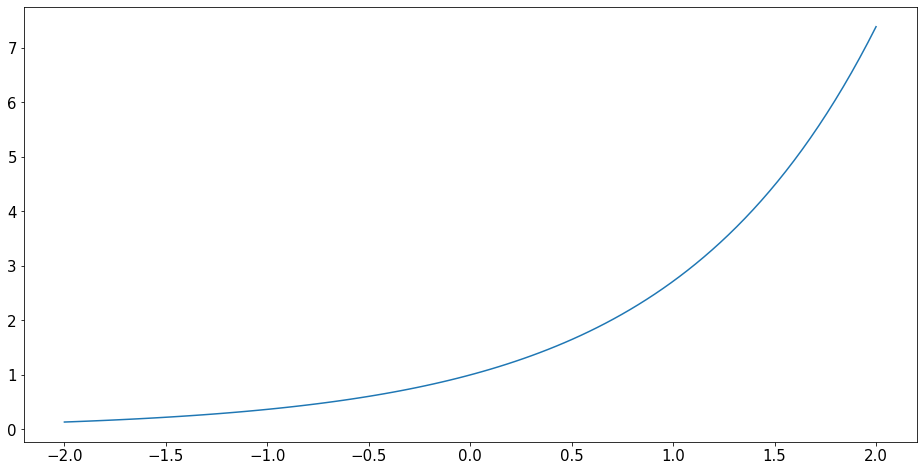

In [9]:
sns.lineplot(x = x, y = y_exp) # grafico teórico

$$ log_2 2 = 1$$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

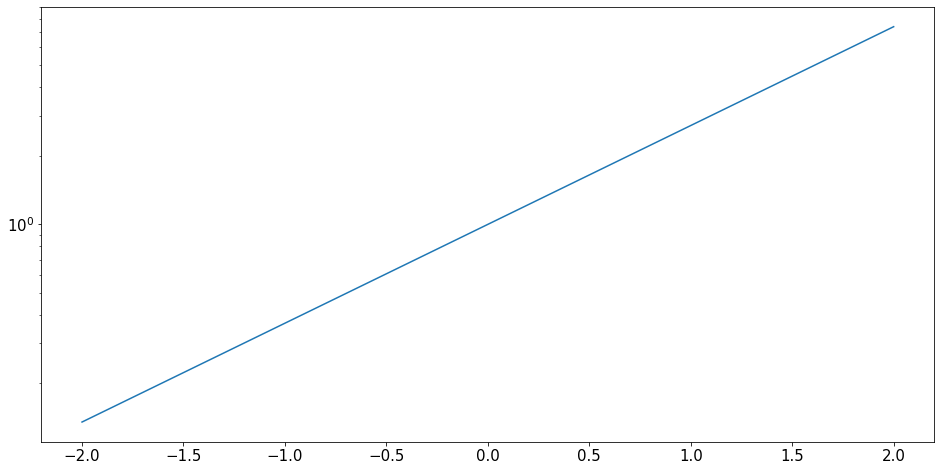

In [10]:
sns.lineplot(x = x, y = y_exp) # grafico teorico
plt.yscale("log")

In [11]:
df_sp = df.query("nome_munic == 'São Paulo'")

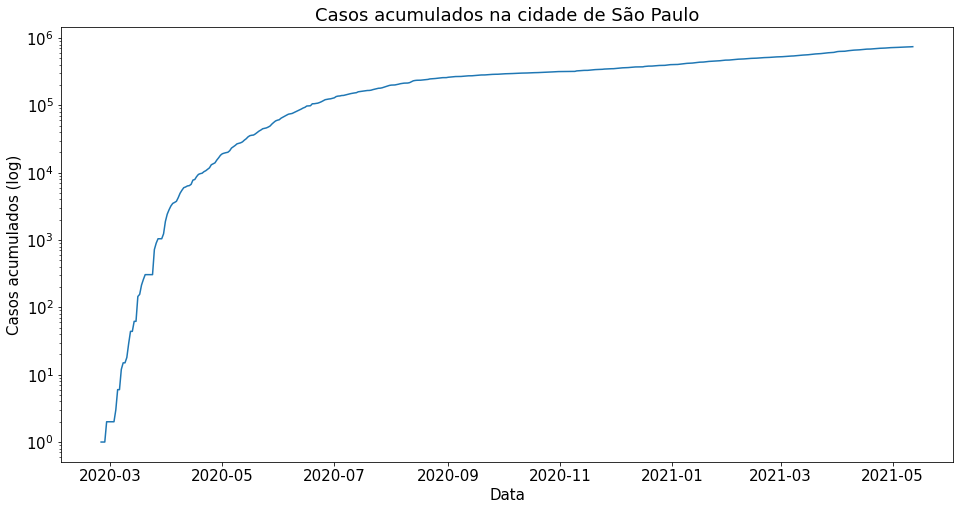

In [12]:
plt.title("Casos acumulados na cidade de São Paulo")
sns.lineplot(data = df_sp, x = "datahora", y = "casos")
plt.ylabel("Casos acumulados (log)")
plt.xlabel("Data")
plt.yscale("log")

## Desafio 01 - Filtrar a base de dados com outra função:

In [13]:
sao_paulo = df.loc[:,"nome_munic"] == "São Paulo"
df_sp2 = df[sao_paulo]
df_sp3 = df[df.loc[:,"nome_munic"] == "São Paulo"]

## Desafio 02 - Escolher outro município (do Estado de São Paulo) para fazer a análise:

Escolhi olhar para o município de Itapecerica da Serra, que é da zona metropolitana de São Paulo. Já morei em Itapecerica e vejo que é uma cidade com uma situação relativamente preocupante, pois aparece bastante no noticiário:

In [14]:
df_ita = df[df.loc[:,"nome_munic"] == "Itapecerica da Serra"]
df_ita.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
254,Itapecerica da Serra,3522208,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,169619,18223,15074,0,8.0,"-23,7161","-46,8572",9
899,Itapecerica da Serra,3522208,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,169619,18223,15074,0,8.0,"-23,7161","-46,8572",9
1544,Itapecerica da Serra,3522208,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,169619,18223,15074,0,8.0,"-23,7161","-46,8572",9
2189,Itapecerica da Serra,3522208,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,169619,18223,15074,0,8.0,"-23,7161","-46,8572",9
2834,Itapecerica da Serra,3522208,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,169619,18223,15074,0,8.0,"-23,7161","-46,8572",9


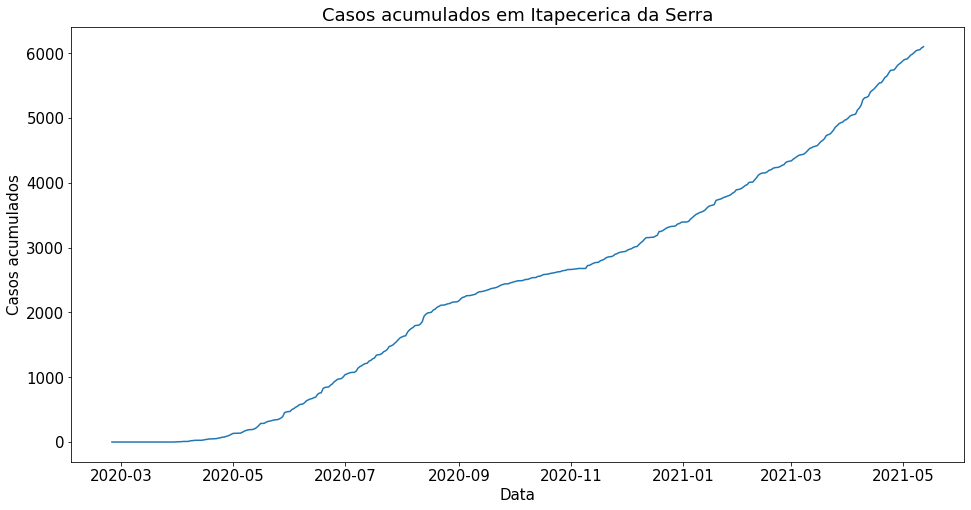

In [15]:
plt.title("Casos acumulados em Itapecerica da Serra")
sns.lineplot(data = df_ita, x = "datahora", y = "casos")
plt.ylabel("Casos acumulados")
plt.xlabel("Data")
plt.show()

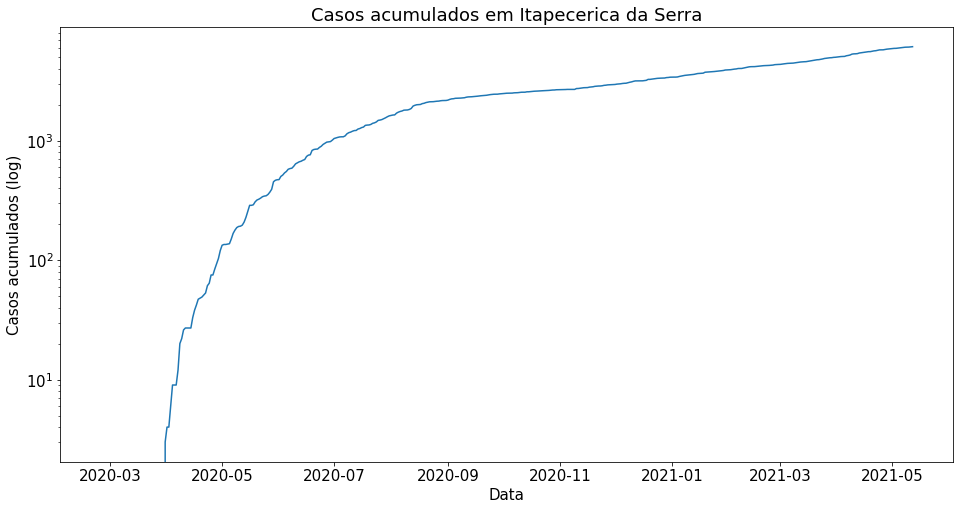

In [16]:
plt.title("Casos acumulados em Itapecerica da Serra")
sns.lineplot(data = df_ita, x = "datahora", y = "casos")
plt.ylabel("Casos acumulados (log)")
plt.xlabel("Data")
plt.yscale("log")
plt.show()

# Sessão 2 -  Taxa de crescimento e média móvel

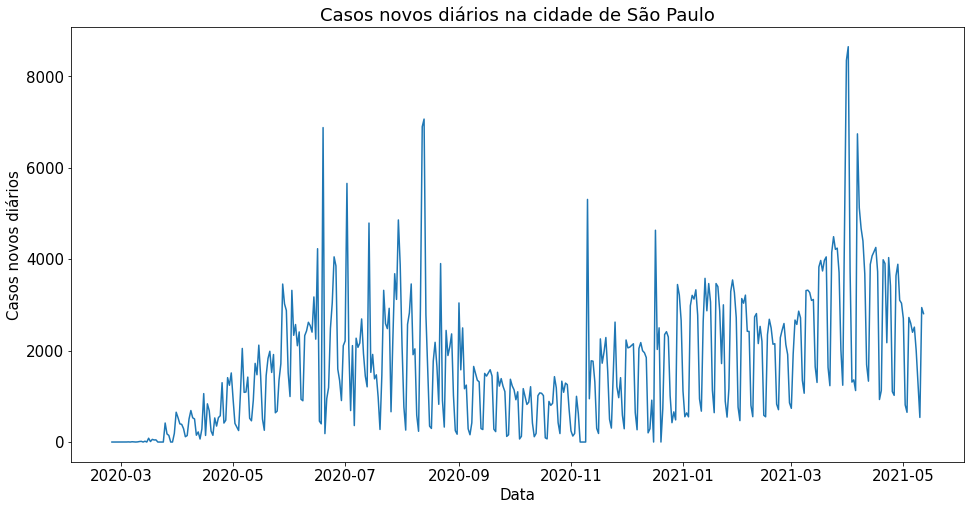

In [17]:
plt.title("Casos novos diários na cidade de São Paulo")
sns.lineplot(data = df_sp, x = "datahora", y = "casos_novos")
plt.ylabel("Casos novos diários")
plt.xlabel("Data")
plt.show()

In [18]:
df_exemplo = pd.DataFrame(data = np.linspace(1,10,10))

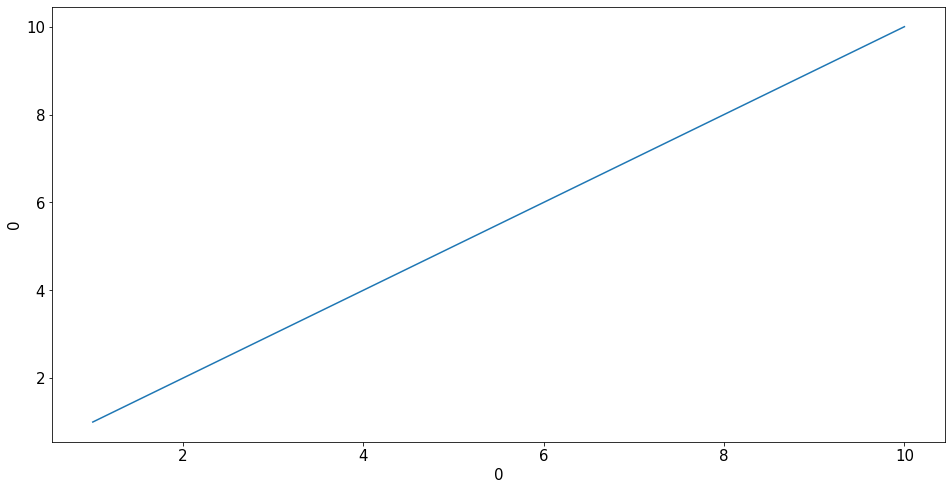

In [19]:
sns.lineplot(data = df_exemplo, x = 0, y = 0) # grafico teórico

In [20]:
df_exemplo.loc[:,"diferenciado"] = df_exemplo.diff()
df_exemplo.head()

,0,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0


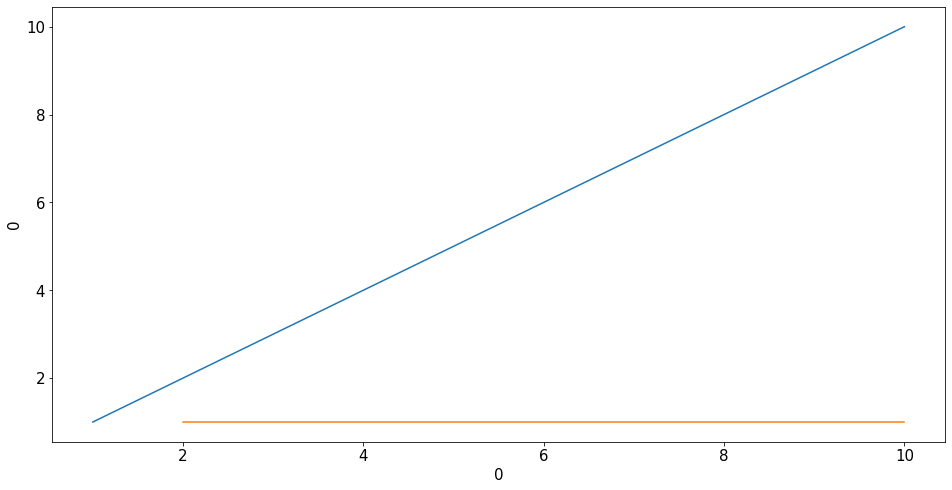

In [21]:
sns.lineplot(data = df_exemplo, x = 0, y = 0)
sns.lineplot(data = df_exemplo, x = 0, y = "diferenciado") # grafico teorico
plt.show()

## Desafio 03 - Um notebook sem warnings:

Para reconfigurar a ativação ou não da mensagem de aviso que recebiamos ao fazer uma nova coluna em um dataframe grande como o que estamos utilizando, eu acessei a dica dada pelo próprio warning, e acessei a página sobre indexing e a [sessão do problema](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy):

In [22]:
pd.set_option('mode.chained_assignment',None)

In [23]:
df_sp.loc[:,"taxa_de_crescimento_casos"] = df_sp.loc[:,"casos_novos"].diff()
df_sp.loc[:,"taxa_de_crescimento_obitos"] = df_sp.loc[:,"obitos_novos"].diff()

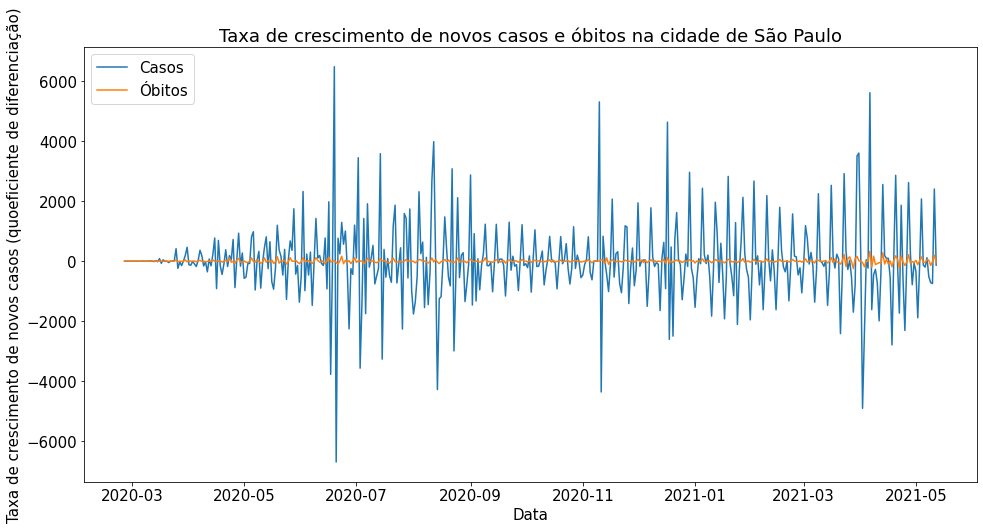

In [24]:
plt.title("Taxa de crescimento de novos casos e óbitos na cidade de São Paulo")
plt.ylabel("Taxa de crescimento de novos casos (quoeficiente de diferenciação)")
plt.xlabel("Data")
sns.lineplot(data = df_sp, x = "datahora", y = "taxa_de_crescimento_casos", label = "Casos")
sns.lineplot(data = df_sp, x = "datahora", y = "taxa_de_crescimento_obitos", label = "Óbitos")
plt.legend()
plt.show()

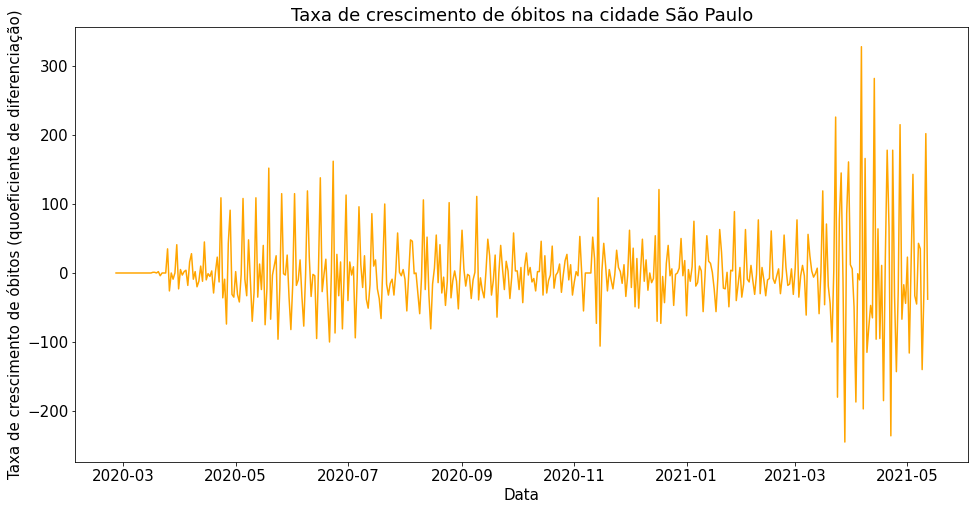

In [25]:
plt.title("Taxa de crescimento de óbitos na cidade São Paulo")
sns.lineplot(data = df_sp, x = "datahora", y = "taxa_de_crescimento_obitos", color = "orange")
plt.ylabel("Taxa de crescimento de óbitos (quoeficiente de diferenciação)")
plt.xlabel("Data")
plt.show()

## Desafio 04 - Pico taxa de casos novos coincide com taxa dos óbitos novos?

Para responder a essa pergunta, a forma mais direta é analisar como varia a taxa de crescimento de óbitos em função da taxa de crescimento de novos casos, através de um scatterplot com a linha de tendência:

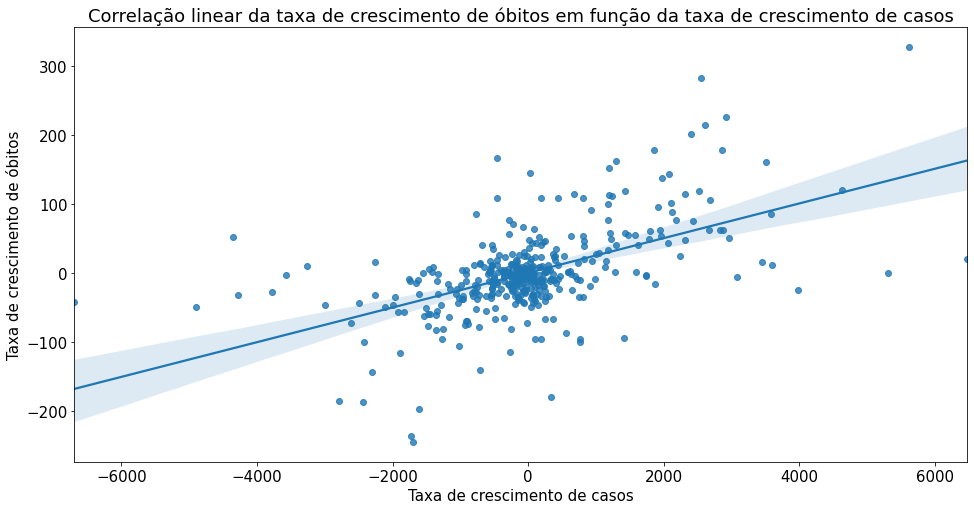

In [26]:
plt.title("Correlação linear da taxa de crescimento de óbitos em função da taxa de crescimento de casos")
sns.regplot(x = df_sp.loc[:,"taxa_de_crescimento_casos"], y = df_sp.loc[:,"taxa_de_crescimento_obitos"])
plt.xlabel("Taxa de crescimento de casos")
plt.ylabel("Taxa de crescimento de óbitos")
plt.show()

Sim, parece haver uma correlação entre as taxas, nos momentos de maior incremento dos novos casos, também há um aumento dos novos óbitos.

Os próximos dois gráficos eu fiz só de curiosidade para examinar a relação entre óbitos totais em função de casos totais:

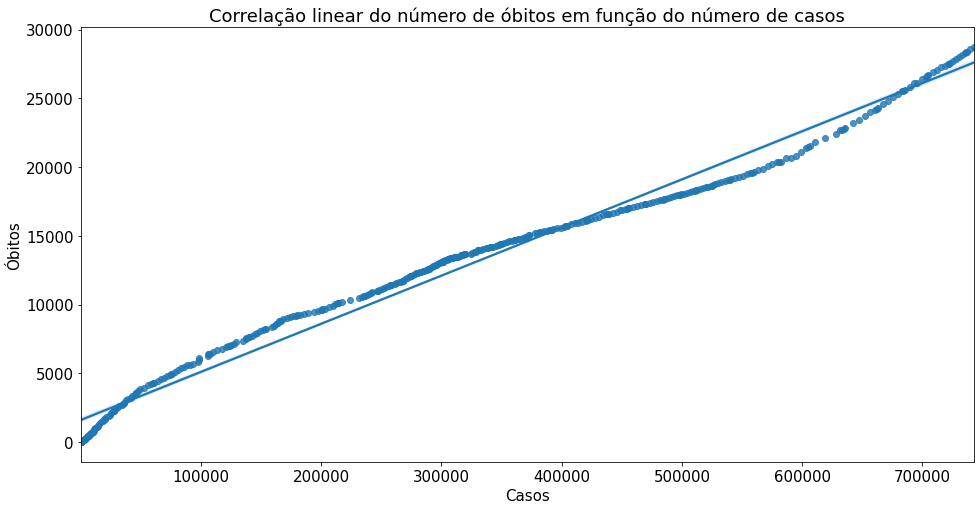

In [27]:
plt.title("Correlação linear do número de óbitos em função do número de casos")
sns.regplot(x = df_sp.loc[:,"casos"], y = df_sp.loc[:,"obitos"])
plt.ylabel("Óbitos")
plt.xlabel("Casos")
plt.show()

Nenhuma surpresa, pois ambos estão aumentando em números absolutos

E número de óbitos novos em função de casos novos:

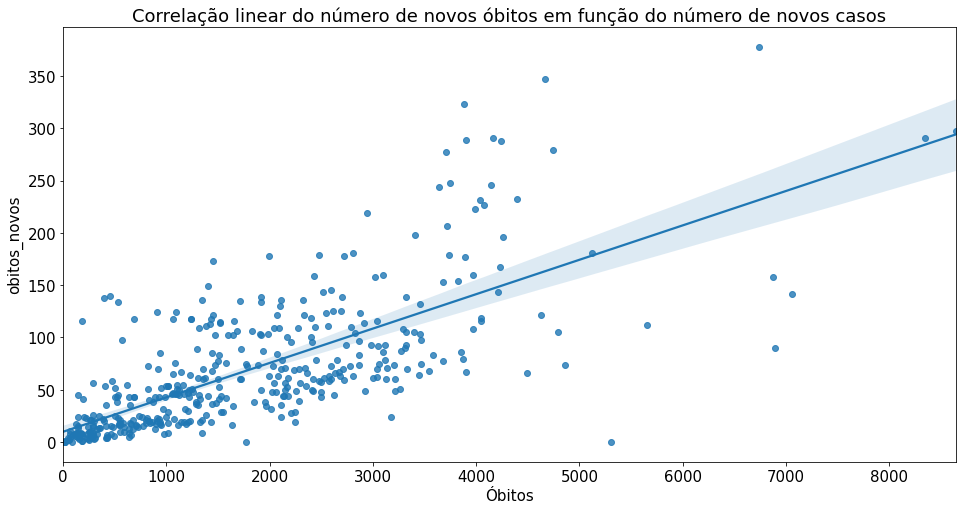

In [28]:
plt.title("Correlação linear do número de novos óbitos em função do número de novos casos")
sns.regplot(x = df_sp.loc[:,"casos_novos"], y = df_sp.loc[:,"obitos_novos"])
plt.xlabel("Casos")
plt.xlabel("Óbitos")
plt.show()

## Seguindo

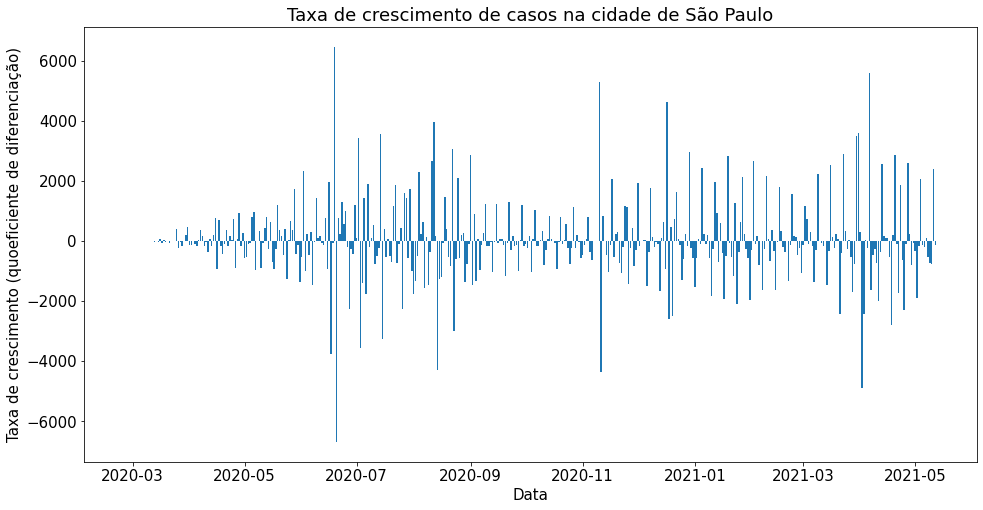

In [29]:
plt.title("Taxa de crescimento de casos na cidade de São Paulo")
plt.bar(df_sp.loc[:,"datahora"], df_sp.loc[:,"taxa_de_crescimento_casos"])
plt.xlabel("Data")
plt.ylabel("Taxa de crescimento (quoeficiente de diferenciação)")
plt.show()

In [30]:
df_sp.loc[:,"ano"] = pd.DatetimeIndex(df_sp.loc[:,"datahora"]).year

In [31]:
df_sp_2021 = df_sp.query("ano == 2021")

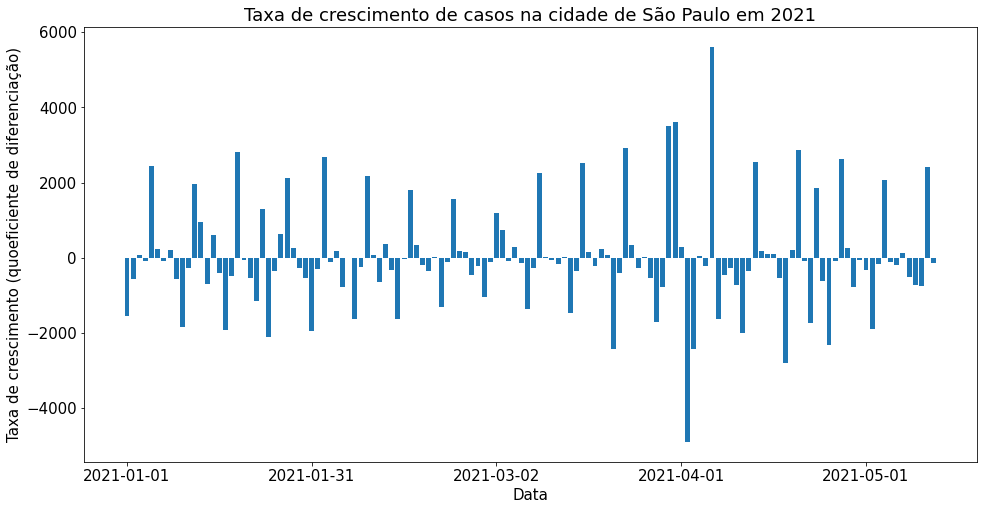

In [32]:
plt.title("Taxa de crescimento de casos na cidade de São Paulo em 2021")
plt.bar(df_sp_2021.loc[:,"datahora"], df_sp_2021.loc[:,"taxa_de_crescimento_casos"]) # arrumar labels truncadas
plt.ylabel("Taxa de crescimento (quoeficiente de diferenciação)")
plt.xlabel("Data")
plt.xticks(df_sp_2021.loc[:,"datahora"][::30]) # marcando os ticks a cada intervalo de 30 dias
plt.show()

In [33]:
df_sp.loc[:,"media_movel_casos"] = df_sp.loc[:,"casos_novos"].rolling(window = 7, center = False).mean()
df_sp.loc[:,"media_movel_obitos"] = df_sp.loc[:,"obitos_novos"].rolling(window = 7, center = False).mean()

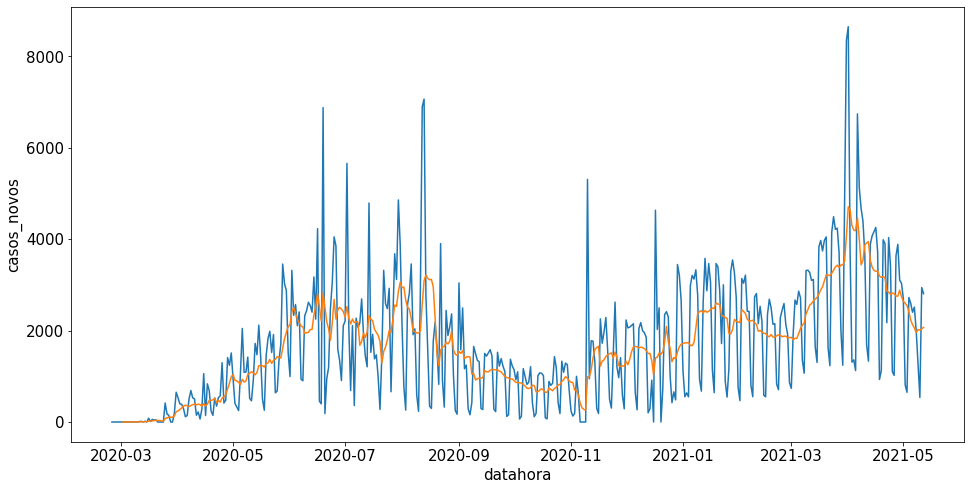

In [34]:
sns.lineplot(data = df_sp, x = "datahora", y = "casos_novos")
sns.lineplot(data = df_sp, x = "datahora", y = "media_movel_casos")

## Desafio 06 - Gerar o gráfico da média móvel do número de óbitos. Mudar os gráficos de casos de linha para barra:

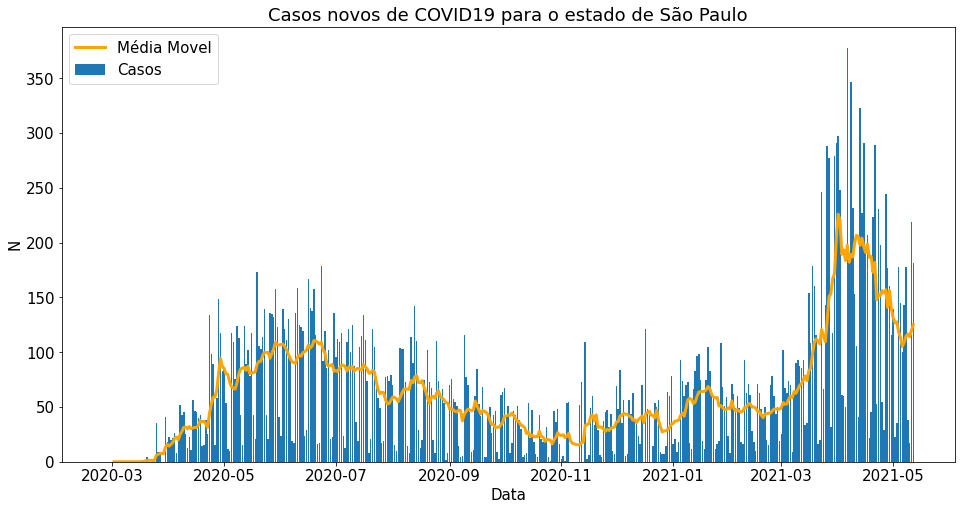

In [35]:
plt.title("Casos novos de COVID19 para o estado de São Paulo")
plt.bar(df_sp.loc[:,"datahora"], df_sp.loc[:,"obitos_novos"], label = "Casos")
sns.lineplot(data = df_sp, x = "datahora", y = "media_movel_obitos", color = "orange", linewidth = 3, label = "Média Movel")
plt.ylabel("N")
plt.xlabel("Data")
plt.legend()
plt.show()

# Sessão 3 - Correlação e função de autocorrelação

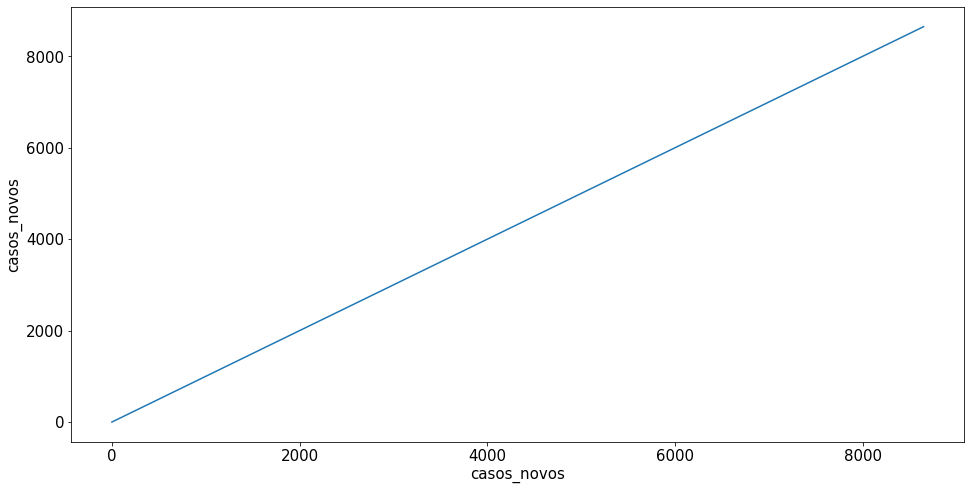

In [36]:
sns.lineplot(data = df_sp, x = "casos_novos", y = "casos_novos") # grafico teórico

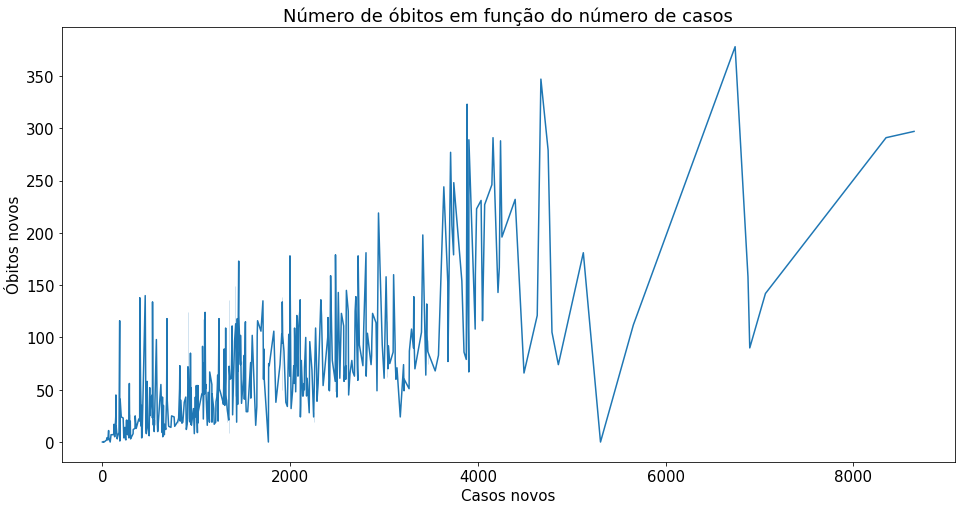

In [37]:
plt.title("Número de óbitos em função do número de casos")
sns.lineplot(data = df_sp, x = "casos_novos", y = "obitos_novos")
plt.ylabel("Óbitos novos")
plt.xlabel("Casos novos")
plt.show()

Eu prefiro a visualização dessa informação como um scatterplot:

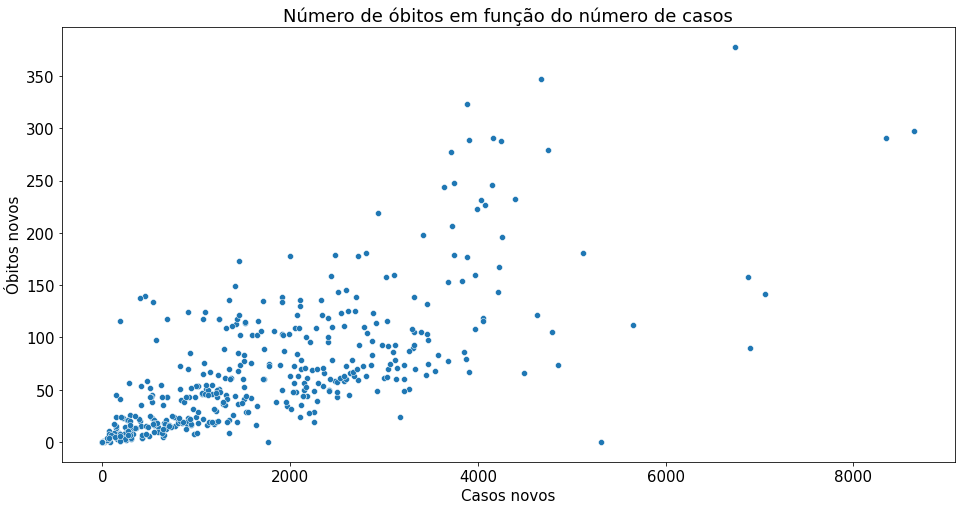

In [38]:
plt.title("Número de óbitos em função do número de casos")
sns.scatterplot(data = df_sp, x = "casos_novos", y = "obitos_novos")
plt.ylabel("Óbitos novos")
plt.xlabel("Casos novos")
plt.show()

## Desafio 07 - Mover o número de óbitos alguns dias (por exemplo 2 semanas) e verificar o resultado no gráfico:

https://www.youtube.com/watch?v=0lsmdNLNorY&ab_channel=codebasics

Primeiro, vamos testar alguns valores "adiantando" o número de óbitos, isto é, trazendo-os para trás:

(provavelmente do jeito mais rápido, mas não mais eficiente)

In [50]:
df_sp.loc[:,"obitos_tras_7"] = df_sp.loc[:,"obitos_novos"].shift(-7)
df_sp.loc[:,"obitos_tras_14"] = df_sp.loc[:,"obitos_novos"].shift(-14)
df_sp.loc[:,"obitos_tras_21"] = df_sp.loc[:,"obitos_novos"].shift(-21)
df_sp.loc[:,"obitos_tras_28"] = df_sp.loc[:,"obitos_novos"].shift(-28)

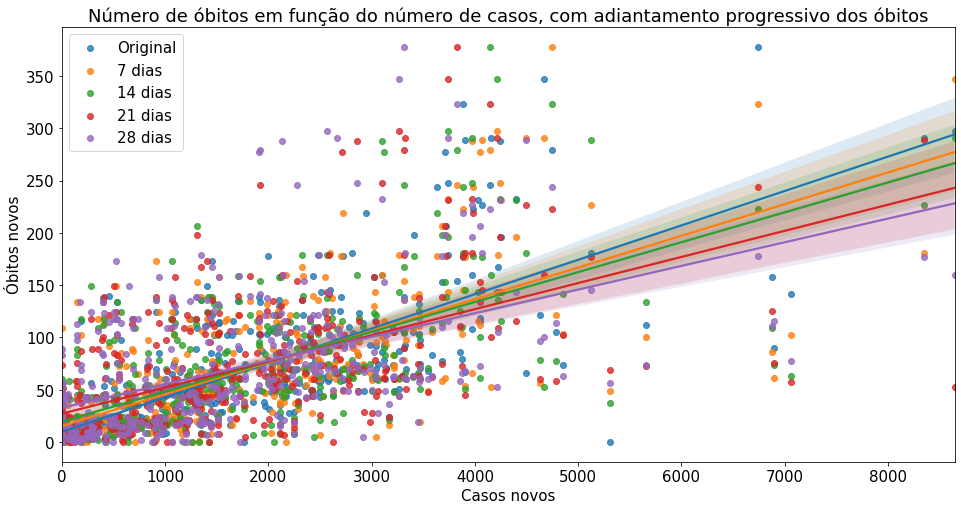

In [51]:
plt.title("Número de óbitos em função do número de casos, com adiantamento progressivo dos óbitos")
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_novos", label = "Original") # adicionando a reta original
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_tras_7", label = "7 dias")
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_tras_14", label = "14 dias")
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_tras_21", label = "21 dias")
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_tras_28", label = "28 dias")
plt.legend()
plt.ylabel("Óbitos novos")
plt.xlabel("Casos novos")
plt.show()

Vemos que, nessa escala, o adiantamento do dado sobre o número de óbitos não parece "melhorar a colinearidade" dos nossos dados. Uma expectativa seria que alterando a data do número de óbitos, teriamos uma relação linear mais bem ajustada, mas a melhor reta ainda parece ser a original. E se nós fizessemos o inverso, e adicionar um "lag" na correlação? "Empurrando" os óbitos para frente?:

In [52]:
df_sp.loc[:,"obitos_frente_7"] = df_sp.loc[:,"obitos_novos"].shift(7)
df_sp.loc[:,"obitos_frente_14"] = df_sp.loc[:,"obitos_novos"].shift(14)
df_sp.loc[:,"obitos_frente_21"] = df_sp.loc[:,"obitos_novos"].shift(21)
df_sp.loc[:,"obitos_frente_28"] = df_sp.loc[:,"obitos_novos"].shift(28)

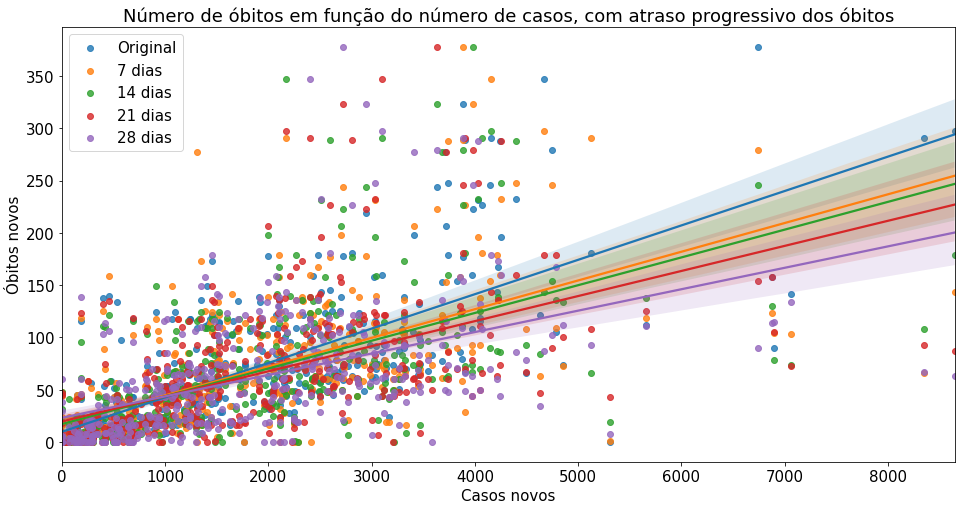

In [53]:
plt.title("Número de óbitos em função do número de casos, com atraso progressivo dos óbitos")
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_novos", label = "Original") # adicionando a reta original
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_frente_7", label = "7 dias")
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_frente_14", label = "14 dias")
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_frente_21", label = "21 dias")
sns.regplot(data = df_sp, x = "casos_novos", y = "obitos_frente_28", label = "28 dias")
plt.legend()
plt.ylabel("Óbitos novos")
plt.xlabel("Casos novos")
plt.show()

Novamente, não parece haver muita diferença na correlação. Isso pode indicar que de fato, não haveria grande variação na forma como o número de óbitos varia em função dos casos, a depender da data que ocorresse o primeiro óbito.

## Seguindo:

Pegando somente para 2021:

In [43]:
df_2021_01 = df_sp.query("mes == 1 & ano == 2021")
df_2021_02 = df_sp.query("mes == 2 & ano == 2021")

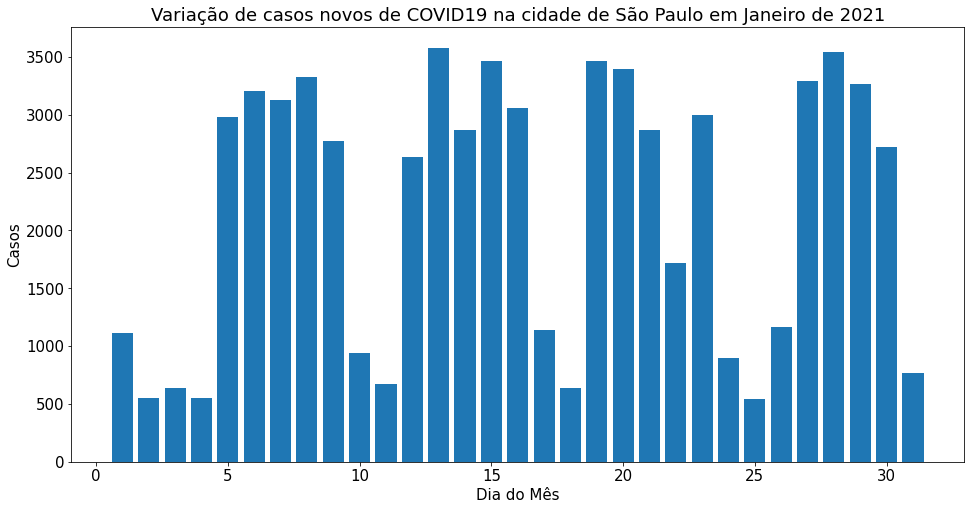

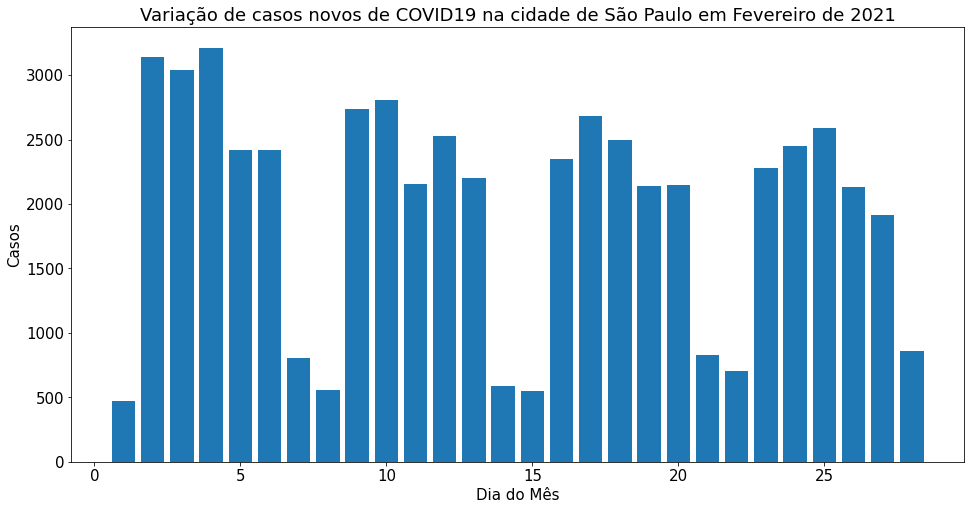

In [54]:
plt.title("Variação de casos novos de COVID19 na cidade de São Paulo em Janeiro de 2021")
plt.bar(np.linspace(1,31,31), df_2021_01.loc[:,"casos_novos"])
plt.ylabel("Casos")
plt.xlabel("Dia do Mês")
plt.show()
plt.title("Variação de casos novos de COVID19 na cidade de São Paulo em Fevereiro de 2021")
plt.bar(np.linspace(1,28,28), df_2021_02.loc[:,"casos_novos"])
plt.ylabel("Casos")
plt.xlabel("Dia do Mês")
plt.show()

In [45]:
from pandas.plotting import autocorrelation_plot

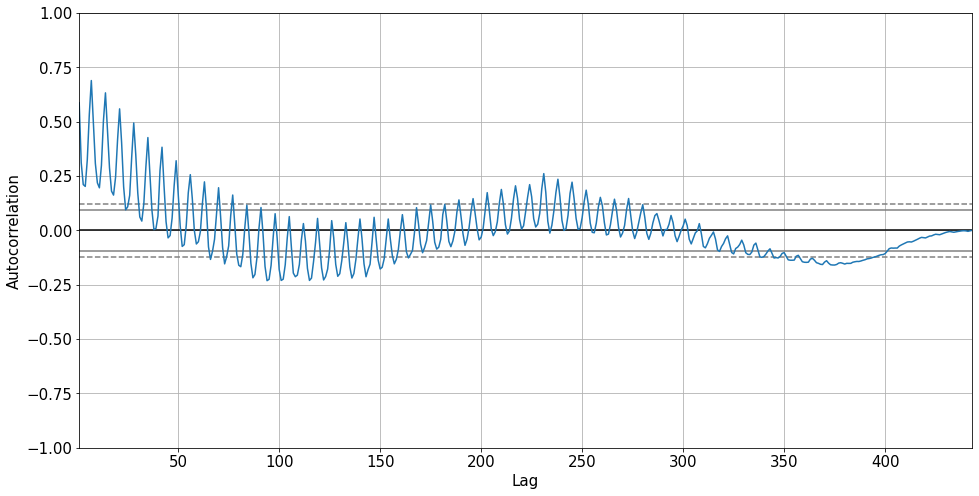

In [58]:
# adicionar eixos parece interferir com a natureza do gráfico, buscar depois como manipular eixos
autocorrelation_plot(df_sp.loc[:,"casos_novos"])
plt.show()

In [47]:
df_sp.shape

(443, 37)

In [48]:
ale = np.random.rand(443)

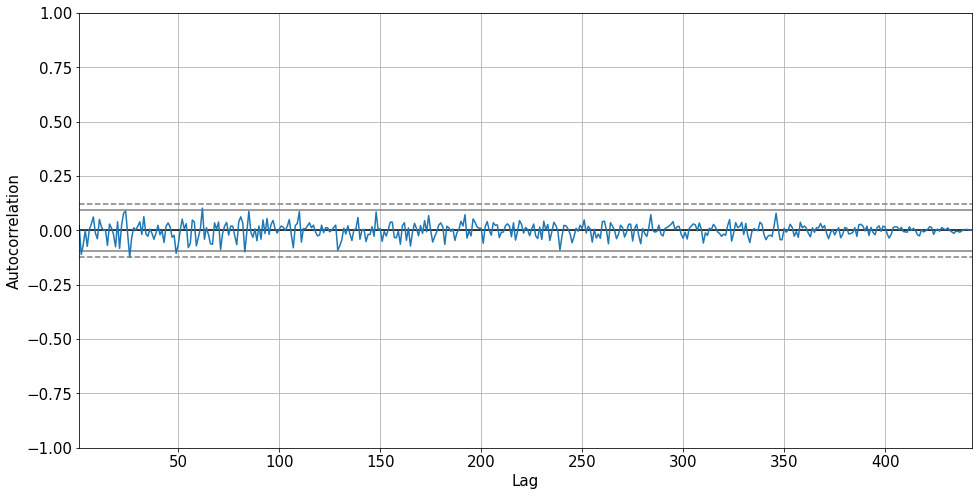

In [49]:
autocorrelation_plot(ale) # grafico teorico

## Desafio 08 - Função de correlação cruzada dos óbitos e casos

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xcorr.html#matplotlib.pyplot.xcorr

https://www.geeksforgeeks.org/matplotlib-pyplot-xcorr-in-python/

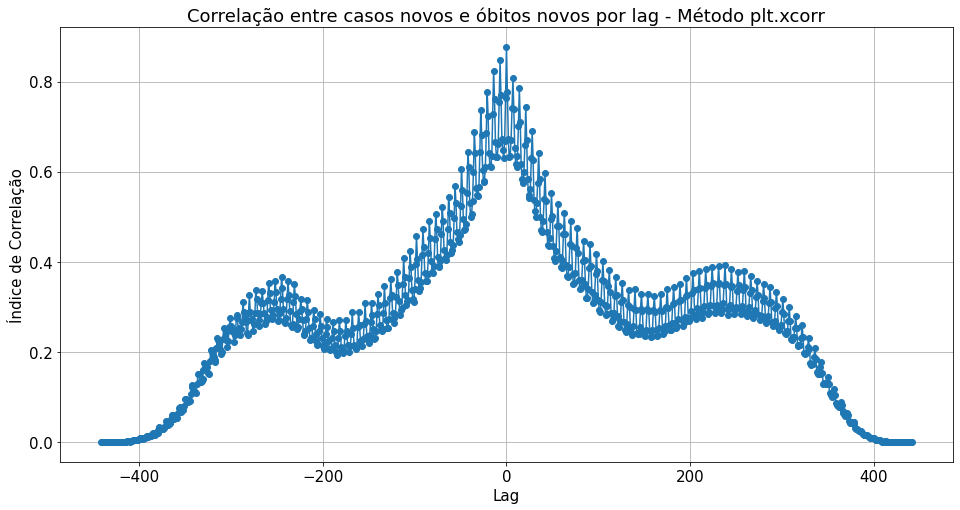

In [118]:
plt.title("Correlação entre casos novos e óbitos novos por lag - Método plt.xcorr")
plt.xcorr(x = df_sp.loc[:,"casos_novos"].astype(float), y = df_sp.loc[:,"obitos_novos"].astype(float),
          maxlags = None, usevlines = False, linestyle = "-")
plt.grid()
plt.ylabel("Índice de Correlação")
plt.xlabel("Lag")
plt.show()

A interpretação desse gráfico é um pouco diferente do anterior, mas se repararmos bem, a ideia é a mesma. O que difere é que, basicamente, ao invés de calcular a autocorrealação com índices negativos, a função calcula a correlação para _lags_ negativos. A princípio, a interpretação dessa diferença não interfere na forma como analisamos a autocorrelação: há uma alta correlação entre as séries temporais de óbitos e casos, nos primeiros dias, caindo logo depois até mais ou menos o dia 180, quando há um leve aumento, seguido por uma nova queda mais ou menos do dia 220 para frente.

Uma outra solução que vi meus colegas chegarem, é, aplicar a função de autocorrelação, usando a segunda série temporal como lag. 

Fonte: [Notebook do Pedro Almeida](https://github.com/PedroHCAlmeida/Bootcamp_alura/blob/main/Modulo_3/Aula1.ipynb)

Para fazer isso, foi necessário definir uma nova função que aplica essa ideia:


In [109]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(-lag))

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


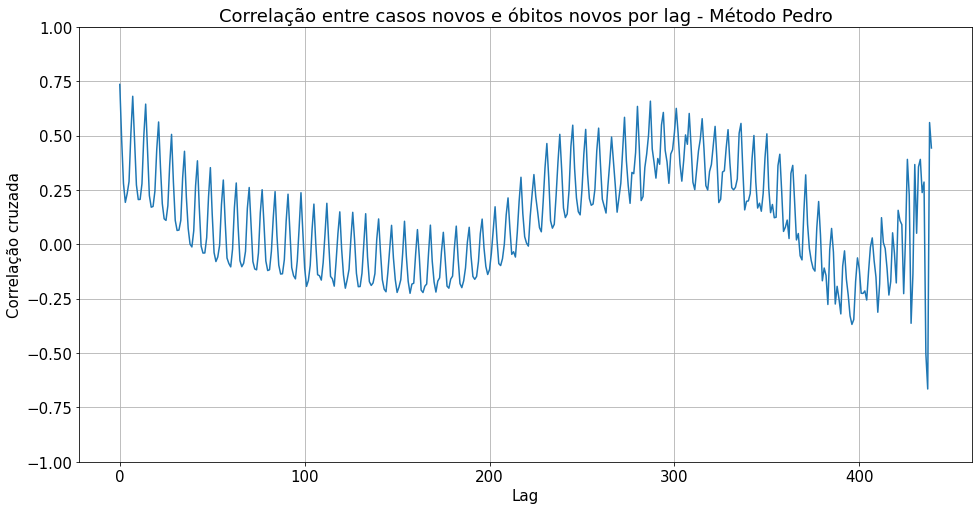

In [115]:
y_corr = [crosscorr(df_sp['casos_novos'], df_sp['obitos_novos'], lag) for lag in range(0,len(df_sp))]
x_lag = range(0,len(df_sp))
plt.plot(x_lag, y_corr)
plt.ylim(-1,1)
plt.title('Correlação entre casos novos e óbitos novos por lag - Método Pedro')
plt.xlabel('Lag')
plt.ylabel('Correlação cruzada')
plt.grid()
plt.show()

Me parece que ambas as soluções chegam mais ou menos no mesmo resultado, mas é importante notar que parece haver uma diferença de escala:

Enquanto no primeiro momento, os valores de correlação são bem parecidos, 75~80%, no platô dos ~200 dias, no primeiro método, a colerração não supera os 40%, no método 2, ela fica por volta dos 50%.

## Desafio 09 - Estudar outros municípios

Como eu utilizei o município de Itapecerica da Serra como comparativo durante a aula, vou refazer as análises usando o mesmo município para o desafio, focando nas principais análises que fizemos: